In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv('advertising.csv')

In [9]:
df.sample(10)

,TV,Radio,Newspaper,Sales
121,18.8,21.7,50.4,7.0
153,171.3,39.7,37.7,16.0
18,69.2,20.5,18.3,11.3
114,78.2,46.8,34.5,14.6
25,262.9,3.5,19.5,17.0
152,197.6,23.3,14.2,16.6
126,7.8,38.9,50.6,6.6
118,125.7,36.9,79.2,15.9
111,241.7,38.0,23.2,21.8
98,289.7,42.3,51.2,25.4


In [10]:
df.shape

(200, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [13]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [14]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


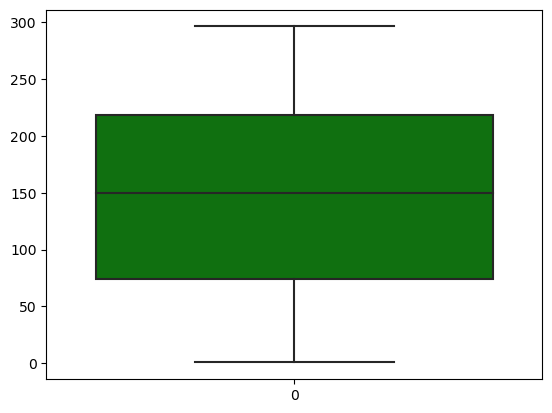

In [16]:
sns.boxplot(df['TV'],color='green')
plt.show()

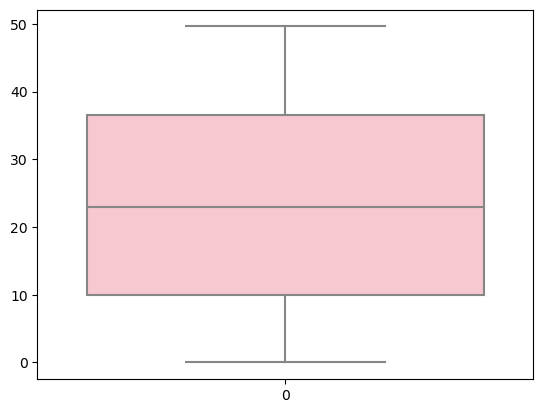

In [17]:
sns.boxplot(df['Radio'],color='pink')
plt.show()

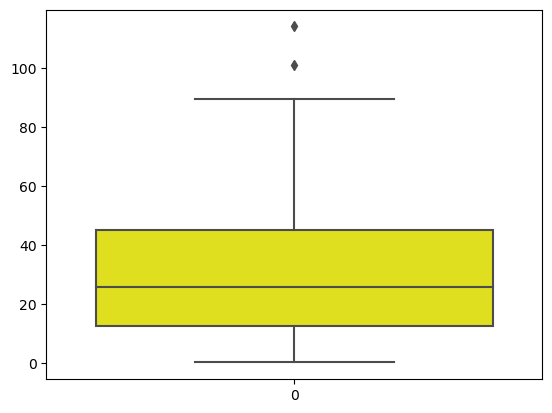

In [18]:
sns.boxplot(df['Newspaper'],color='yellow')
plt.show()

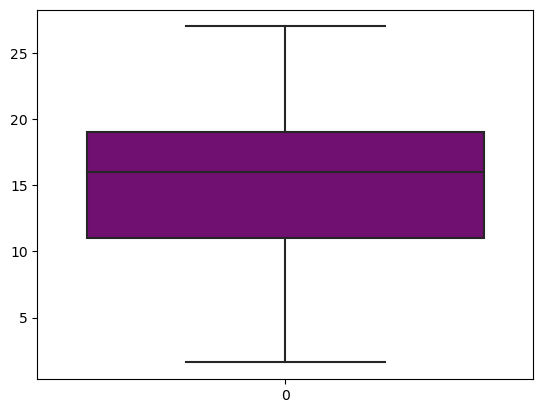

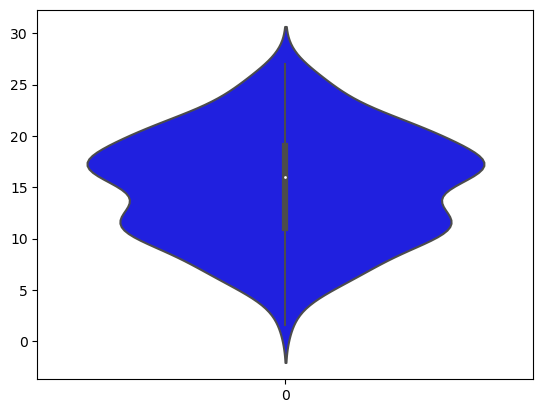

In [20]:
sns.boxplot(df['Sales'],color='purple')
plt.show()
sns.violinplot(df['Sales'],color='blue')
plt.show()

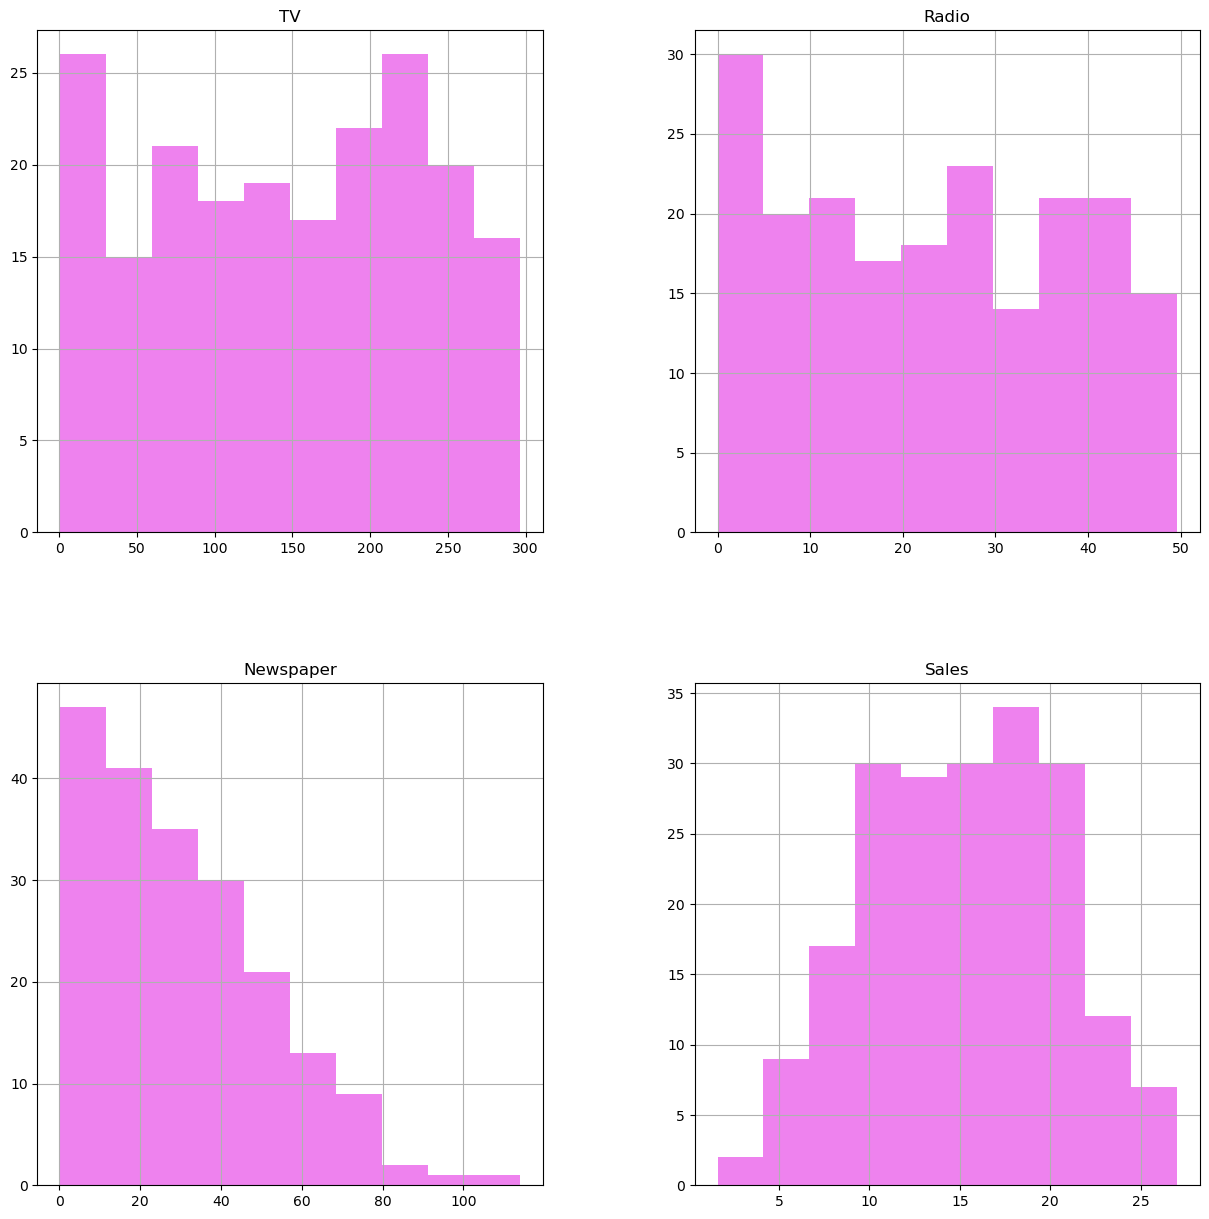

In [24]:
df.hist(figsize=(15,15),color='Violet')
plt.show()

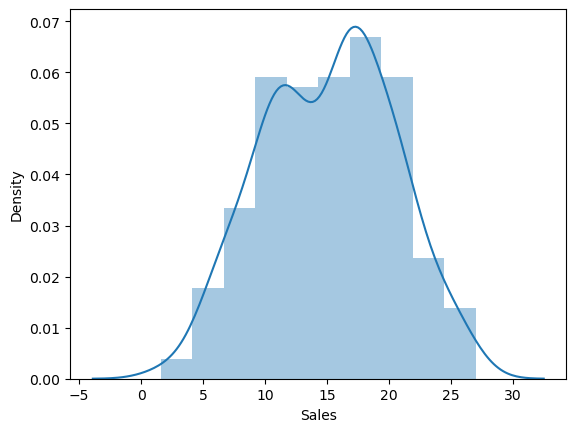

In [26]:
sns.distplot(df['Sales'])
plt.show()

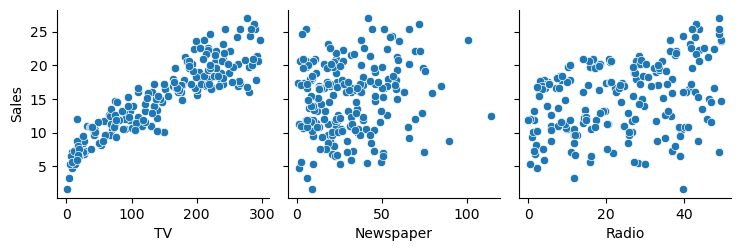

In [27]:
sns.pairplot(df,x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
plt.show()

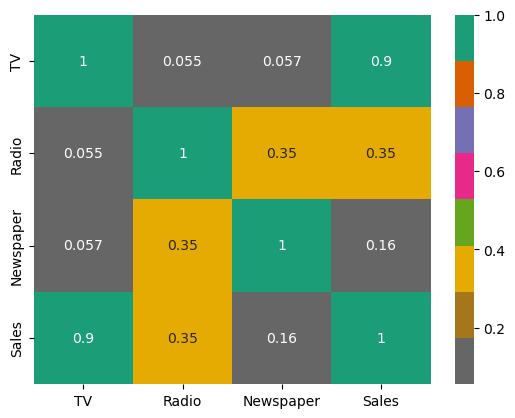

In [31]:
sns.heatmap(df.corr(), cmap="Dark2_r", annot = True)
plt.show()

In [34]:
X=df.drop(['Sales'],axis=1)
y=df[['Sales']]

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [86]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [87]:
model.score(X_train,y_train)

0.9159933497916115

In [88]:
model.score(X_test,y_test)

0.869205273491013

In [89]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_clf = linear_model.LinearRegression()
poly_clf.fit(X_train2, y_train)
print(poly_clf.score(X_train2, y_train))

0.9267301129670507


In [90]:
print(poly_clf.score(X_test2, y_test))

0.8841307951170106


In [91]:
y_predictions=model.predict(X_test)

In [80]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.3662313868452756
RMSE: 1.984443302410095
R-Squared 0.8448538197964504
